<a href="https://colab.research.google.com/github/franciscogarate/cdiae/blob/main/notebooks/9_GLM_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de regresión GLM usando la base de datos de precios de casas de California

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.generalized_linear_model as glm
from sklearn.metrics import mean_squared_error

In [2]:
!git clone https://github.com/franciscogarate/cdiae

Cloning into 'cdiae'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 170 (delta 81), reused 95 (delta 28), pack-reused 0 (from 0)
Receiving objects: 100% (170/170), 3.97 MiB | 13.51 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [4]:
df = pd.read_feather('cdiae/data/03_model_input/california_housing_clean.ftr')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


Seleccionamos las variables relevantes para el modelo (las cuales hemos reducido a 6 en las tareas de analisis bivariantes y de componentes principales anteriores)

In [5]:
df_model = df[['Longitude','MedInc','Population','AveOccup','AveBedrms','target']]

In [6]:
df_model.describe()

,Longitude,MedInc,Population,AveOccup,AveBedrms,target
count,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000,16393.000000
mean,-119.627363,3.664875,1270.523699,2.862434,1.047261,1.942280
std,1.995430,1.448800,627.220656,0.625743,0.066532,0.964867
min,-124.350000,0.536000,5.000000,1.161290,0.866013,0.149990
25%,-121.820000,2.563900,812.000000,2.434066,1.002770,1.188000
50%,-118.600000,3.500000,1158.000000,2.811881,1.043807,1.781000
75%,-118.030000,4.593800,1635.000000,3.243553,1.088685,2.509000
max,-114.570000,8.011300,3132.000000,4.560748,1.239521,5.000000


Especificamos la fórmula del GLM

In [7]:
formula = 'target ~ Longitude + MedInc + Population + AveOccup + AveBedrms'

Ajustamos GLM con familia Poisson

In [8]:
model = smf.glm(formula=formula, data=df_model, family=sm.families.Poisson())
results = model.fit()

Resumen del modelo

In [9]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                16393
Model:                            GLM   Df Residuals:                    16387
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22350.
Date:                Sun, 19 Oct 2025   Deviance:                       4013.5
Time:                        08:27:02   Pearson chi2:                 4.19e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1992
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4671      0.359      1.302      0.1

Predicciones sobre el conjunto completo:

In [10]:
df['Estimacion_GLM'] = results.predict(df)
df['Error_GLM'] = results.resid_response
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Estimacion_GLM,Error_GLM
0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.790188,-0.269188
1,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.904310,0.508690
2,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.204314,1.217686
3,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,2.315081,0.381919
4,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,2.128090,0.863910


Calculamos el RMSE (este indicador sirve para compararse con otras regresiones)

In [11]:
rmse = np.sqrt(mean_squared_error(df.target, df.Estimacion_GLM))
rmse

np.float64(0.6967117750450845)

Graficamos los errores y comprobamos que no siguen estrictamente una distribución normal con media cero

<Axes: >

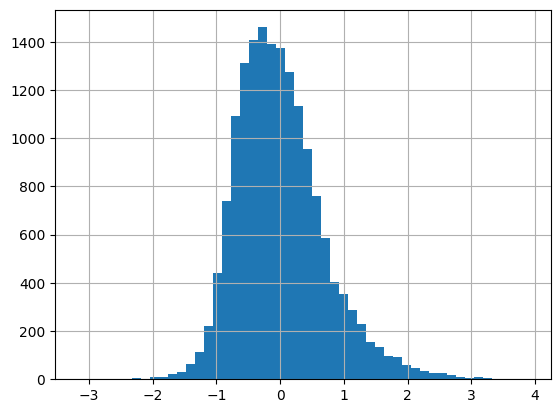

In [12]:
df.Error_GLM.hist(bins=50)

Calculamos otros estadísticos de la regresión:

In [13]:
print(f'RMSE: {rmse:.4f}')
print(f'AIC: {results.aic:.2f}')
print(f'BIC: {results.bic_llf:.2f}')

RMSE: 0.6967
AIC: 44711.72
BIC: 44757.95
